<div style="text-align: center;">
    <h1>RESEARCH PROJECT PART 1</h1>
</div>

<div style="text-align: center;">
    The primary purpose of this Jupyter notebook is to preprocess the datasets while maintaining data quality and downsizing them as much as possible, aiming to transform the Taobao dataset into a medium-sized, computationally manageable dataset that aligns with the SMEs narrative.</h1>
</div>

# 1. Environment preparation

In [3]:
import gzip
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import time

The 4 different subsets of Taobao needs to be linked, with behaviour log dataset being the largest, after experimenting, it was more ideal to start linking first the user and ad feature using the ad_id.

In [2]:
#define the raw sample dataset
df_sample = pd.read_csv("raw_sample.csv")

In [3]:
#define the ad feature dataset
df_ad = pd.read_csv("ad_feature.csv")

In [4]:
#define the user profile dataset
df_user = pd.read_csv("user_profile.csv")

# 2. Treating datasets

### 2.1. Df_sample

#### 2.1.1.  Dataset shape

In [5]:
#inspect the shape of the df sample 
df_sample.shape

(26557961, 6)

There are 26M rows of user information.

#### 2.1.2. Target variable proportions

In [6]:
#calculate the proportion of each unique value in the 'clk' column
proportions = df_sample['clk'].value_counts(normalize=True)

#print the proportions
print(proportions)

clk
0    0.948563
1    0.051437
Name: proportion, dtype: float64


The proportion of clicks to non clicks is way too disproportionate, with only 5% clicks as opposed to 95% non clicks.

### 2.2. Df_ad

In [7]:
df_ad.shape

(846811, 6)

There are 846K rows of ad information and 6 ad features.

### 2.3. Missing values

#### 2.3.1.  Identification

Both datasets will first be checked for any missing values.

In [8]:
df_sample.isna().sum()

user          0
time_stamp    0
adgroup_id    0
pid           0
nonclk        0
clk           0
dtype: int64

In [9]:
df_ad.isna().sum()

adgroup_id          0
cate_id             0
campaign_id         0
customer            0
brand          246330
price               0
dtype: int64

The ad feature dataset has 246K missing values, since it is large, we can choose to drop them instead of filling them.

#### 2.3.2.  Drop missing values

In [10]:
#define the new df clean of missing values
df_ad_cleaned = df_ad.dropna()

In [11]:
#verify if there are still any missing values
df_ad_cleaned.isna().sum()

adgroup_id     0
cate_id        0
campaign_id    0
customer       0
brand          0
price          0
dtype: int64

Some datatypes do take a lot of computing space, adjusting them will reduce it.

In [12]:
#identify large datatypes to reduce computing space
df_ad_cleaned.dtypes

adgroup_id       int64
cate_id          int64
campaign_id      int64
customer         int64
brand          float64
price          float64
dtype: object

In [13]:
#convert columns from float64 to int from df_sample
df_sample['user'] = df_sample['user'].astype('int')
df_sample['time_stamp'] = df_sample['time_stamp'].astype('int')
df_sample['adgroup_id'] = df_sample['adgroup_id'].astype('int')
df_sample['nonclk'] = df_sample['nonclk'].astype('int')
df_sample['clk'] = df_sample['clk'].astype('int')

In [14]:
#convert columns from float64 to int from df_ad_cleaned
df_ad_cleaned['adgroup_id'] = df_ad_cleaned['adgroup_id'].astype('int')
df_ad_cleaned['cate_id'] = df_ad_cleaned['cate_id'].astype('int')
df_ad_cleaned['campaign_id'] = df_ad_cleaned['campaign_id'].astype('int')
df_ad_cleaned['customer'] = df_ad_cleaned['customer'].astype('int')
df_ad_cleaned['brand'] = df_ad_cleaned['brand'].astype('int')

### 2.4. Merge both datasets

Next, df_sample and df_ad_cleaned will be merged using the common column ad_id.

#### 2.4.1.  Merge using the common column

In [15]:
new_df = pd.merge(df_sample, df_ad_cleaned, on=['adgroup_id'])

#### 2.4.2. Inspect new dataset characteristics

In [16]:
new_df.shape

(18266267, 11)

The new merged dataset has 18M of rows, less than before.

In [17]:
#get an overview of the dataset 
new_df.head()

,user,time_stamp,adgroup_id,pid,nonclk,clk,cate_id,campaign_id,customer,brand,price
0,581738,1494137644,1,430548_1007,1,0,9025,108570,1337,20169,17.0
1,914836,1494650879,4,430548_1007,1,0,7958,385883,39662,216840,85.0
2,914836,1494651029,5,430548_1007,1,0,7958,385883,39662,216840,60.0
3,399907,1494302958,8,430548_1007,1,0,1626,388290,42349,241359,63.0
4,628137,1494524935,9,430548_1007,1,0,9784,393714,32496,457216,396.0


### 2.5. Treat user profile dataset

Next, user_profile and df_sample will be merged, but first user_profile has to be inspected for any missing values.

#### 2.5.1.  Missing values

In [19]:
df_user.isna().sum()

userid                        0
cms_segid                     0
cms_group_id                  0
final_gender_code             0
age_level                     0
pvalue_level             575917
shopping_level                0
occupation                    0
new_user_class_level     344920
dtype: int64

All missing values will again be dropped instead of filled due to the large dataset size.

In [20]:
#drop missing values 
df_user_cleaned = df_user.dropna()

In [21]:
#verify if there are any null values left
df_user_cleaned.isna().sum()

userid                   0
cms_segid                0
cms_group_id             0
final_gender_code        0
age_level                0
pvalue_level             0
shopping_level           0
occupation               0
new_user_class_level     0
dtype: int64

In [22]:
#inspect the new dimensions of dataset 
df_user_cleaned.shape

(395932, 9)

#### 2.5.2. Merge datasets

In [23]:
#rename column to match the one in the combined dataset 
df_user_cleaned.rename(columns={'userid': 'user'}, inplace=True)

In [24]:
#merge datasets using the common column user 
other_df = pd.merge(new_df, df_user_cleaned, on=['user'])

In [25]:
other_df.shape

(7003565, 19)

The size of the dataset got reduced to 7M rows.

In [26]:
#calculate again the proportion of each unique value in the 'clk' column
new_proportions = other_df['clk'].value_counts(normalize=True)

#print the new proportions 
new_proportions

clk
0    0.950807
1    0.049193
Name: proportion, dtype: float64

The original distribution of clicks to non clicks is more or less still maintained.

#### 2.5.3. Inspect the newly merged dataset characteristics

In [27]:
other_df.head()

,user,time_stamp,adgroup_id,pid,nonclk,clk,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level
0,117840,1494036743,11,430548_1007,1,0,5239,384809,25745,134255,176.0,49,6,2,6,2.0,3,0,2.0
1,623911,1494625301,11,430548_1007,1,0,5239,384809,25745,134255,176.0,93,11,1,5,3.0,3,0,2.0
2,623911,1494451608,11,430548_1007,1,0,5239,384809,25745,134255,176.0,93,11,1,5,3.0,3,0,2.0
3,976358,1494156949,13,430548_1007,1,0,7211,130458,6395,112840,289.0,20,3,2,3,2.0,3,0,4.0
4,286630,1494218579,13,430539_1007,1,0,7211,130458,6395,112840,289.0,17,3,2,3,1.0,3,0,4.0


In [29]:
#rename the column to remove the extra space in the original column name 
other_df.rename(columns={"new_user_class_level ": "new_user_class_level"}, inplace=True)

In [30]:
#convert columns from float64 to int
other_df['pvalue_level'] = other_df['pvalue_level'].astype('int')
other_df['new_user_class_level'] = other_df['new_user_class_level'].astype('int')

### 2.6. Behaviour dataset

For the final merge, the behaviour_log will first be broken down into separate CSV files to reduce strain on memory resources. To minimise file sizes and eliminate unnecessary information, only rows with matching brand IDs and category IDs will be included. Ideally, matching user IDs could also be added as a condition for more precise filtering, however, this significantly increases computational complexity and processing time, making it less practical. This approach accounts for the prior removal of rows with missing values, which may have left rows in behaviour_log without exact matches in the merged dataset.

In [83]:
def filter_and_rename_csv_gzip(file_path, df_ad_cleaned, chunk_size=100000, chunks_per_file=1205):
    #convert df_ad_cleaned to a set of tuples for fast lookup
    ad_cleaned_set = set(df_ad_cleaned[['cate_id', 'brand']].itertuples(index=False, name=None))
    
    filtered_chunks = []
    
    #Start the timer
    start_time = time.time()
    chunk_count = 0
    file_count = 0
    
    #open the gzipped file
    with gzip.open(file_path, 'rt') as f:
        #read the file in chunks 
        for chunk in pd.read_csv(f, chunksize=chunk_size):
            #rename columns of the behaviour log in the chunk to match the ones in the merged dataset 
            chunk.rename(columns={'cate': 'cate_id'}, inplace=True)
            
            #convert to tuples for fast lookup
            chunk_tuples = chunk[['cate_id', 'brand']].apply(tuple, axis=1)
            
            #filter the chunk to include only rows with matching cate_id and brand
            filtered_chunk = chunk[chunk_tuples.isin(ad_cleaned_set)]
            
            #append the filtered chunk to the list
            if not filtered_chunk.empty:
                filtered_chunks.append(filtered_chunk)
            
            chunk_count += 1
            
            #print progress every 100 chunks to track it
            if chunk_count % 100 == 0:
                print(f"Processed {chunk_count} chunks...")
            
            #save the file after processing 1205 chunks
            if chunk_count % chunks_per_file == 0:
                #concatenate all filtered chunks into a single df for this batch
                batch_df = pd.concat(filtered_chunks, ignore_index=True)
                #save to a new file
                batch_df.to_csv(f'filtered_results_{file_count}.csv', index=False)
                print(f"Processed {chunk_count} chunks and saved to file {file_count}.csv")
                #clear the list of filtered chunks
                filtered_chunks = []
                file_count += 1
    
    #save any remaining chunks to a final file
    if filtered_chunks:
        batch_df = pd.concat(filtered_chunks, ignore_index=True)
        batch_df.to_csv(f'filtered_results_{file_count}.csv', index=False)
        print(f"Processed remaining chunks and saved to file {file_count}.csv")
    
    #stop the timer and print the elapsed time
    elapsed_time = time.time() - start_time
    print(f"Time taken to filter and process the CSV: {elapsed_time:.2f} seconds")
    print(f"Total number of chunks processed: {chunk_count}")

#define the path of the behaviour dataset large gzipped CSV file
file_path = 'C:\\Users\\riham\\Desktop\\Jupyter Notebook\\Research project\\behavior_log.csv.tar.gz'

#use the function to filter the CSV file
filter_and_rename_csv_gzip(file_path, df_ad_cleaned)

Processed 100 chunks...
Processed 200 chunks...
Processed 300 chunks...
Processed 400 chunks...
Processed 500 chunks...
Processed 600 chunks...
Processed 700 chunks...
Processed 800 chunks...
Processed 900 chunks...
Processed 1000 chunks...
Processed 1100 chunks...
Processed 1200 chunks...
Processed 1205 chunks and saved to file 0.csv
Processed 1300 chunks...
Processed 1400 chunks...
Processed 1500 chunks...
Processed 1600 chunks...
Processed 1700 chunks...
Processed 1800 chunks...
Processed 1900 chunks...
Processed 2000 chunks...
Processed 2100 chunks...
Processed 2200 chunks...
Processed 2300 chunks...
Processed 2400 chunks...
Processed 2410 chunks and saved to file 1.csv
Processed 2500 chunks...
Processed 2600 chunks...
Processed 2700 chunks...
Processed 2800 chunks...
Processed 2900 chunks...
Processed 3000 chunks...
Processed 3100 chunks...
Processed 3200 chunks...
Processed 3300 chunks...
Processed 3400 chunks...
Processed 3500 chunks...
Processed 3600 chunks...
Processed 3615 ch

With the behaviour dataset split into separate files, the next step is to identify and filter the desired users. Users will be separated into those who clicked and those who did not click to investigate the presence of any duplicates.

### 2.7. Users characteristics

#### 2.7.1. Unique users

In [31]:
other_df["user"].nunique()

388162

Overall, there are 388K unique users.

#### 2.7.2. Users who clicked

In [32]:
#filter rows where column "clk" == 1
clicked_users = other_df[other_df['clk'] == 1]

In [33]:
#inspect number of unique users 
clicked_users['user'].nunique()

148608

There are 141K unique users who clicked. 

#### 2.7.3. Users who did not click

In [34]:
#filter rows where column "clk" == 0
non_clicked_users = other_df[other_df['clk'] == 0]

In [35]:
#inspect number of unique users 
non_clicked_users['user'].nunique()

385363

There are 381K unique users who did not click.

#### 2.7.4. Overall shape of both

In [36]:
non_clicked_users.shape

(6659039, 19)

In [37]:
clicked_users.shape

(344526, 19)

The overall shape compared to the unique shape indicates that many users are recurrent. A new dataset will be created containing only unique users to reduce the size of the dataframe and eliminate duplicate information.

In [38]:
#get unique clicked users 
clicked_users_df = other_df[other_df['clk'] == 1].drop_duplicates(subset='user')

#get unique non-clicked users 
non_clicked_users_df = other_df[other_df['clk'] == 0].drop_duplicates(subset='user')

#concatenate both dfs
merged_df = pd.concat([clicked_users_df, non_clicked_users_df])

#reset the index 
merged_df.reset_index(drop=True, inplace=True)

In [39]:
#inspect the new size
merged_df.shape

(533971, 19)

The new dataset, containing only unique users, has been created with a reduced size. Next, the dataset will be examined to identify any users who clicked on one ad but did not click on another.

In [40]:
merged_df['user'].value_counts()

user
642854     2
311954     2
844162     2
970090     2
471726     2
          ..
7389       1
512074     1
221691     1
567229     1
1022567    1
Name: count, Length: 388162, dtype: int64

The dataset includes only unique users who clicked and did not click on an ad. A user with a frequency of 2 indicates that they were part of both the "click" and "not clicked" datasets. These users must be prioritised in the upcoming sampling, as they could be beneficial to the machine learning models due to having the same characteristics but different ad-clicking outcomes.

In [41]:
#get an overview of the new dataset 
merged_df.head()

,user,time_stamp,adgroup_id,pid,nonclk,clk,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level
0,642854,1494264162,102,430539_1007,0,1,126,138148,20107,102457,98.0,8,2,2,2,2,3,0,3
1,843732,1494420431,102,430539_1007,0,1,126,138148,20107,102457,98.0,19,3,2,3,2,3,0,2
2,1076956,1494334701,102,430539_1007,0,1,126,138148,20107,102457,98.0,19,3,2,3,2,3,0,2
3,358193,1494393953,102,430548_1007,0,1,126,138148,20107,102457,98.0,7,2,2,2,2,3,0,1
4,1002263,1494513830,102,430539_1007,0,1,126,138148,20107,102457,98.0,19,3,2,3,2,3,0,2


In [42]:
#inspect the target variable count 
merged_df['clk'].value_counts()

clk
0    385363
1    148608
Name: count, dtype: int64

In [43]:
#inspect the distribution of the target variable
merged_df['clk'].value_counts(normalize=True)

clk
0    0.721693
1    0.278307
Name: proportion, dtype: float64

The proportions did shift compared to the intitial dataset, however the original distribution is still conserved to an acceptable degree.

In [44]:
#inspect the new dataset shape
merged_df.shape

(533971, 19)

The size of the users has been significantly downsized to almost half compared to the intial dataset. 

### 2.8. The behaviour dataset processing

For each CSV file that was saved previously, the same code will be run to extract only the rows matching the user, brand, and category IDs of the merged_df dataset. Ideally, this could be done in a single code execution and saved in one CSV file, but due to memory limitations, it must be broken into parts, with each CSV file treated separately.

#### 2.8.1. First file

In [53]:
def filter_csv_by_user_ids(file_path, merged_df, chunk_size=100000, progress_interval=100):
    #extract unique combinations of 'user', 'cate_id', 'brand' from merged_df
    user_cate_brand_set = set(merged_df[['user', 'cate_id', 'brand']].itertuples(index=False, name=None))
    
    filtered_chunks = []
    chunk_count = 0
    
    #open the CSV file and read in chunks
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk_count += 1
        
        #filter the chunk to include only rows with matching 'user', 'cate_id', and 'brand'
        chunk_tuples = chunk[['behavior_log.csv', 'cate_id', 'brand']].apply(tuple, axis=1)
        filtered_chunk = chunk[chunk_tuples.isin(user_cate_brand_set)]
        
        #append the filtered chunk to the list
        if not filtered_chunk.empty:
            filtered_chunks.append(filtered_chunk)
        
        #print progress every 100 chunks
        if chunk_count % progress_interval == 0:
            print(f"Processed {chunk_count} chunks...")
    
    #concatenate all the filtered chunks into a single DataFrame
    filtered_df = pd.concat(filtered_chunks, ignore_index=True)
    
    #rename the 'behavior_log.csv' column to 'user'
    filtered_df.rename(columns={'behavior_log.csv': 'user'}, inplace=True)
    
    return filtered_df


#path to the first behaviour csv file 
file_path = 'C:\\Users\\riham\\Desktop\\Jupyter Notebook\\Research project\\filtered_results_0.csv'

#use the function to filter the CSV file
first_filter_bh = filter_csv_by_user_ids(file_path, merged_df)

#print the shape and first few rows of the filtered DataFrame to verify
print(f"Filtered DataFrame Shape: {first_filter_bh.shape}")
print(first_filter_bh.head())

Processed 100 chunks...
Processed 200 chunks...
Processed 300 chunks...
Processed 400 chunks...
Processed 500 chunks...
Processed 600 chunks...
Processed 700 chunks...
Filtered DataFrame Shape: (403773, 5)
      user  time_stamp btag  cate_id   brand
0  1023869  1493765344   pv     9460  316040
1   203542  1493809161   pv     7208  289629
2   967005  1493823837   pv     4377  139797
3   577498  1493779396   pv    11153  441003
4   577498  1493778987   pv    11153  441003


#### 2.8.2. Second file

In [59]:
def filter_csv_by_user_ids(file_path, merged_df, chunk_size=100000, progress_interval=100):
    #extract unique combinations of 'user', 'cate_id', 'brand' from merged_df
    user_cate_brand_set = set(merged_df[['user', 'cate_id', 'brand']].itertuples(index=False, name=None))
    
    filtered_chunks = []
    chunk_count = 0
    
    #open the CSV file and read in chunks
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk_count += 1
        
        # Filter the chunk to include only rows with matching 'user', 'cate_id', 'brand', and 'adgroup_id'
        chunk_tuples = chunk[['behavior_log.csv', 'cate_id', 'brand']].apply(tuple, axis=1)
        filtered_chunk = chunk[chunk_tuples.isin(user_cate_brand_set)]
        
        # Append the filtered chunk to the list
        if not filtered_chunk.empty:
            filtered_chunks.append(filtered_chunk)
        
        # Print progress every `progress_interval` chunks
        if chunk_count % progress_interval == 0:
            print(f"Processed {chunk_count} chunks...")
    
    # Concatenate all the filtered chunks into a single DataFrame
    filtered_df = pd.concat(filtered_chunks, ignore_index=True)
    
    # Rename the 'behavior_log.csv' column to 'user'
    filtered_df.rename(columns={'behavior_log.csv': 'user'}, inplace=True)
    
    return filtered_df

# Assuming `combined_df` is the DataFrame containing the final 'user', 'cate_id', 'brand', and 'adgroup_id' combinations
# Path to your regular CSV file
file_path = 'C:\\Users\\riham\\Desktop\\Jupyter Notebook\\Research project\\filtered_results_1.csv'

# Use the function to filter the CSV file
second_filter_bh = filter_csv_by_user_ids(file_path, merged_df)

# Print the shape and first few rows of the filtered DataFrame to verify
print(f"Filtered DataFrame Shape: {second_filter_bh.shape}")
print(second_filter_bh.head())

Processed 100 chunks...
Processed 200 chunks...
Processed 300 chunks...
Processed 400 chunks...
Processed 500 chunks...
Processed 600 chunks...
Processed 700 chunks...
Filtered DataFrame Shape: (441047, 5)
     user  time_stamp btag  cate_id   brand
0    6996  1493823272   pv     6806  453462
1  441450  1493807565   pv     6736  396805
2  441450  1493807571   pv     6736  396805
3  631381  1493812848   pv     6261  136767
4  631381  1493812829   pv     6261  136767


#### 2.8.3. Third file

In [54]:
def filter_csv_by_user_ids(file_path, merged_df, chunk_size=100000, progress_interval=100):
    # Extract unique combinations of 'user', 'cate_id', 'brand', and 'adgroup_id' from combined_df
    user_cate_brand_set = set(merged_df[['user', 'cate_id', 'brand']].itertuples(index=False, name=None))
    
    filtered_chunks = []
    chunk_count = 0
    
    # Open the CSV file and read in chunks
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk_count += 1
        
        # Filter the chunk to include only rows with matching 'user', 'cate_id', 'brand', and 'adgroup_id'
        chunk_tuples = chunk[['behavior_log.csv', 'cate_id', 'brand']].apply(tuple, axis=1)
        filtered_chunk = chunk[chunk_tuples.isin(user_cate_brand_set)]
        
        # Append the filtered chunk to the list
        if not filtered_chunk.empty:
            filtered_chunks.append(filtered_chunk)
        
        # Print progress every `progress_interval` chunks
        if chunk_count % progress_interval == 0:
            print(f"Processed {chunk_count} chunks...")
    
    # Concatenate all the filtered chunks into a single DataFrame
    filtered_df = pd.concat(filtered_chunks, ignore_index=True)
    
    # Rename the 'behavior_log.csv' column to 'user'
    filtered_df.rename(columns={'behavior_log.csv': 'user'}, inplace=True)
    
    return filtered_df

# Assuming `combined_df` is the DataFrame containing the final 'user', 'cate_id', 'brand', and 'adgroup_id' combinations
# Path to your regular CSV file
file_path = 'C:\\Users\\riham\\Desktop\\Jupyter Notebook\\Research project\\filtered_results_2.csv'

# Use the function to filter the CSV file
third_filter_bh = filter_csv_by_user_ids(file_path, merged_df)

# Print the shape and first few rows of the filtered DataFrame to verify
print(f"Filtered DataFrame Shape: {third_filter_bh.shape}")
print(third_filter_bh.head())

Processed 100 chunks...
Processed 200 chunks...
Processed 300 chunks...
Processed 400 chunks...
Processed 500 chunks...
Processed 600 chunks...
Processed 700 chunks...
Filtered DataFrame Shape: (514752, 5)
    user  time_stamp btag  cate_id  brand
0  47038  1493108532   pv     6261  96354
1  47038  1493108539   pv     6261  96354
2  47038  1493108516   pv     6261  96354
3  47038  1493108496   pv     6261  96354
4  47038  1493108532   pv     6261  96354


#### 2.8.4. Fourth file

In [55]:
def filter_csv_by_user_ids(file_path, merged_df, chunk_size=100000, progress_interval=100):
    # Extract unique combinations of 'user', 'cate_id', 'brand', and 'adgroup_id' from combined_df
    user_cate_brand_set = set(merged_df[['user', 'cate_id', 'brand']].itertuples(index=False, name=None))
    
    filtered_chunks = []
    chunk_count = 0
    
    # Open the CSV file and read in chunks
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk_count += 1
        
        # Filter the chunk to include only rows with matching 'user', 'cate_id', 'brand', and 'adgroup_id'
        chunk_tuples = chunk[['behavior_log.csv', 'cate_id', 'brand']].apply(tuple, axis=1)
        filtered_chunk = chunk[chunk_tuples.isin(user_cate_brand_set)]
        
        # Append the filtered chunk to the list
        if not filtered_chunk.empty:
            filtered_chunks.append(filtered_chunk)
        
        # Print progress every `progress_interval` chunks
        if chunk_count % progress_interval == 0:
            print(f"Processed {chunk_count} chunks...")
    
    # Concatenate all the filtered chunks into a single DataFrame
    filtered_df = pd.concat(filtered_chunks, ignore_index=True)
    
    # Rename the 'behavior_log.csv' column to 'user'
    filtered_df.rename(columns={'behavior_log.csv': 'user'}, inplace=True)
    
    return filtered_df

# Assuming `combined_df` is the DataFrame containing the final 'user', 'cate_id', 'brand', and 'adgroup_id' combinations
# Path to your regular CSV file
file_path = 'C:\\Users\\riham\\Desktop\\Jupyter Notebook\\Research project\\filtered_results_3.csv'

# Use the function to filter the CSV file
fourth_filter_bh = filter_csv_by_user_ids(file_path, merged_df)

# Print the shape and first few rows of the filtered DataFrame to verify
print(f"Filtered DataFrame Shape: {fourth_filter_bh.shape}")
print(fourth_filter_bh.head())

Processed 100 chunks...
Processed 200 chunks...
Processed 300 chunks...
Processed 400 chunks...
Processed 500 chunks...
Processed 600 chunks...
Processed 700 chunks...
Filtered DataFrame Shape: (414414, 5)
     user  time_stamp btag  cate_id   brand
0  997893  1493987951   pv        1  185160
1  997893  1493951661   pv        1  185160
2  997893  1493951660   pv        1  185160
3  997893  1493951603   pv        1  185160
4  997893  1493951583   pv        1  185160


#### 2.8.5. Fifth file

In [56]:
def filter_csv_by_user_ids(file_path, merged_df, chunk_size=100000, progress_interval=100):
    # Extract unique combinations of 'user', 'cate_id', 'brand', and 'adgroup_id' from combined_df
    user_cate_brand_set = set(merged_df[['user', 'cate_id', 'brand']].itertuples(index=False, name=None))
    
    filtered_chunks = []
    chunk_count = 0
    
    # Open the CSV file and read in chunks
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk_count += 1
        
        # Filter the chunk to include only rows with matching 'user', 'cate_id', 'brand', and 'adgroup_id'
        chunk_tuples = chunk[['behavior_log.csv', 'cate_id', 'brand']].apply(tuple, axis=1)
        filtered_chunk = chunk[chunk_tuples.isin(user_cate_brand_set)]
        
        # Append the filtered chunk to the list
        if not filtered_chunk.empty:
            filtered_chunks.append(filtered_chunk)
        
        # Print progress every `progress_interval` chunks
        if chunk_count % progress_interval == 0:
            print(f"Processed {chunk_count} chunks...")
    
    # Concatenate all the filtered chunks into a single DataFrame
    filtered_df = pd.concat(filtered_chunks, ignore_index=True)
    
    # Rename the 'behavior_log.csv' column to 'user'
    filtered_df.rename(columns={'behavior_log.csv': 'user'}, inplace=True)
    
    return filtered_df

# Assuming `combined_df` is the DataFrame containing the final 'user', 'cate_id', 'brand', and 'adgroup_id' combinations
# Path to your regular CSV file
file_path = 'C:\\Users\\riham\\Desktop\\Jupyter Notebook\\Research project\\filtered_results_4.csv'

# Use the function to filter the CSV file
fifth_filter_bh = filter_csv_by_user_ids(file_path, merged_df)

# Print the shape and first few rows of the filtered DataFrame to verify
print(f"Filtered DataFrame Shape: {fifth_filter_bh.shape}")
print(fifth_filter_bh.head())

Processed 100 chunks...
Processed 200 chunks...
Processed 300 chunks...
Processed 400 chunks...
Processed 500 chunks...
Processed 600 chunks...
Processed 700 chunks...
Filtered DataFrame Shape: (310984, 5)
     user  time_stamp btag  cate_id   brand
0  230939  1494592425   pv     6057   70992
1  502932  1494555089   pv     6181  242771
2  502932  1494555098   pv     6181  242771
3  502932  1494555098   pv     6181  242771
4  788774  1494576649   pv    11480  242206


#### 2.8.6. Sixth file

In [57]:
def filter_csv_by_user_ids(file_path, merged_df, chunk_size=100000, progress_interval=100):
    # Extract unique combinations of 'user', 'cate_id', 'brand', and 'adgroup_id' from combined_df
    user_cate_brand_set = set(merged_df[['user', 'cate_id', 'brand']].itertuples(index=False, name=None))
    
    filtered_chunks = []
    chunk_count = 0
    
    # Open the CSV file and read in chunks
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk_count += 1
        
        # Filter the chunk to include only rows with matching 'user', 'cate_id', 'brand', and 'adgroup_id'
        chunk_tuples = chunk[['behavior_log.csv', 'cate_id', 'brand']].apply(tuple, axis=1)
        filtered_chunk = chunk[chunk_tuples.isin(user_cate_brand_set)]
        
        # Append the filtered chunk to the list
        if not filtered_chunk.empty:
            filtered_chunks.append(filtered_chunk)
        
        # Print progress every `progress_interval` chunks
        if chunk_count % progress_interval == 0:
            print(f"Processed {chunk_count} chunks...")
    
    # Concatenate all the filtered chunks into a single DataFrame
    filtered_df = pd.concat(filtered_chunks, ignore_index=True)
    
    # Rename the 'behavior_log.csv' column to 'user'
    filtered_df.rename(columns={'behavior_log.csv': 'user'}, inplace=True)
    
    return filtered_df

# Assuming `combined_df` is the DataFrame containing the final 'user', 'cate_id', 'brand', and 'adgroup_id' combinations
# Path to your regular CSV file
file_path = 'C:\\Users\\riham\\Desktop\\Jupyter Notebook\\Research project\\filtered_results_5.csv'

# Use the function to filter the CSV file
sixth_filter_bh = filter_csv_by_user_ids(file_path, merged_df)

# Print the shape and first few rows of the filtered DataFrame to verify
print(f"Filtered DataFrame Shape: {sixth_filter_bh.shape}")
print(sixth_filter_bh.head())

Processed 100 chunks...
Processed 200 chunks...
Processed 300 chunks...
Processed 400 chunks...
Processed 500 chunks...
Processed 600 chunks...
Processed 700 chunks...
Filtered DataFrame Shape: (583566, 5)
     user  time_stamp btag  cate_id   brand
0  840506  1494149456   pv     6380  139615
1  881255  1494140213   pv     4378  139106
2  345986  1494115341   pv     4513   51551
3  413096  1494125853   pv     9202  249007
4  101693  1494139552   pv     6806  387520


#### 2.8.7. Seventh file

In [58]:
def filter_csv_by_user_ids(file_path, merged_df, chunk_size=100000, progress_interval=100):
    # Extract unique combinations of 'user', 'cate_id', 'brand', and 'adgroup_id' from combined_df
    user_cate_brand_set = set(merged_df[['user', 'cate_id', 'brand']].itertuples(index=False, name=None))
    
    filtered_chunks = []
    chunk_count = 0
    
    # Open the CSV file and read in chunks
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunk_count += 1
        
        # Filter the chunk to include only rows with matching 'user', 'cate_id', 'brand', and 'adgroup_id'
        chunk_tuples = chunk[['behavior_log.csv', 'cate_id', 'brand']].apply(tuple, axis=1)
        filtered_chunk = chunk[chunk_tuples.isin(user_cate_brand_set)]
        
        # Append the filtered chunk to the list
        if not filtered_chunk.empty:
            filtered_chunks.append(filtered_chunk)
        
        # Print progress every `progress_interval` chunks
        if chunk_count % progress_interval == 0:
            print(f"Processed {chunk_count} chunks...")
    
    # Concatenate all the filtered chunks into a single DataFrame
    filtered_df = pd.concat(filtered_chunks, ignore_index=True)
    
    # Rename the 'behavior_log.csv' column to 'user'
    filtered_df.rename(columns={'behavior_log.csv': 'user'}, inplace=True)
    
    return filtered_df

# Assuming `combined_df` is the DataFrame containing the final 'user', 'cate_id', 'brand', and 'adgroup_id' combinations
# Path to your regular CSV file
file_path = 'C:\\Users\\riham\\Desktop\\Jupyter Notebook\\Research project\\filtered_results_6.csv'

# Use the function to filter the CSV file
seventh_filter_bh = filter_csv_by_user_ids(file_path, merged_df)

# Print the shape and first few rows of the filtered DataFrame to verify
print(f"Filtered DataFrame Shape: {seventh_filter_bh.shape}")
print(seventh_filter_bh.head())

Filtered DataFrame Shape: (624, 5)
       user    time_stamp btag  cate_id     brand
0  552418.0  1.493489e+09   pv   6055.0  101331.0
1  743343.0  1.493536e+09   pv  11392.0   39211.0
2  743343.0  1.493536e+09   pv  11392.0   39211.0
3  913636.0  1.493530e+09   pv   4315.0   54393.0
4  913636.0  1.493530e+09   pv   4315.0   54393.0


#### 2.8.8. Save progress

All progress made from filtering the separate files will be saved into other separate CSV files, this ensures that the code does not need to be rerun and allows the files to be used at any time.

In [65]:
first_filter_bh.to_csv('first_filter_bh.csv', index=False)

second_filter_bh.to_csv('second_filter_bh.csv', index=False)

third_filter_bh.to_csv('third_filter_bh.csv', index=False)

fourth_filter_bh.to_csv('fourth_filter_bh.csv', index=False)

fifth_filter_bh.to_csv('fifth_filter_bh.csv', index=False)

sixth_filter_bh.to_csv('sixth_filter_bh.csv', index=False)

seventh_filter_bh.to_csv('seventh_filter_bh.csv', index=False)

In [45]:
first_filter_bh = pd.read_csv("first_filter_bh.csv")

second_filter_bh = pd.read_csv("second_filter_bh.csv")

third_filter_bh = pd.read_csv("third_filter_bh.csv")

fourth_filter_bh = pd.read_csv("fourth_filter_bh.csv")

fifth_filter_bh = pd.read_csv("fifth_filter_bh.csv")

sixth_filter_bh = pd.read_csv("sixth_filter_bh.csv")

seventh_filter_bh = pd.read_csv("seventh_filter_bh.csv")

#### 2.8.9. Concatenate all the subsets into one dataset

In [46]:
merged_bh_1 = pd.concat([first_filter_bh, second_filter_bh])

In [47]:
merged_bh_2 = pd.concat([third_filter_bh, merged_bh_1])

In [48]:
merged_bh_3 = pd.concat([merged_bh_2, fourth_filter_bh])

In [49]:
merged_bh_4 = pd.concat([merged_bh_3, fifth_filter_bh])

In [50]:
merged_bh_5 = pd.concat([merged_bh_4, sixth_filter_bh])

In [51]:
merged_bh = pd.concat([merged_bh_5, seventh_filter_bh])

#### 2.8.10. Inspect both datasets

In [52]:
#inspect the merged_df shape
merged_df.shape

(533971, 19)

In [53]:
#inspect the merged_bh shape
merged_bh.shape

(2669160, 5)

The merged_df contains around 533k users, and merged_bh contains 2M records. Combining the datasets will increase the total volume of records, and the merging process will be complex, requiring several steps to ensure everything is properly handled.

In [54]:
#get an overview of merged_bh df
merged_bh.head()

,user,time_stamp,btag,cate_id,brand
0,47038.0,1.493109e+09,pv,6261.0,96354.0
1,47038.0,1.493109e+09,pv,6261.0,96354.0
2,47038.0,1.493109e+09,pv,6261.0,96354.0
3,47038.0,1.493108e+09,pv,6261.0,96354.0
4,47038.0,1.493109e+09,pv,6261.0,96354.0


### 2.9. Treatement of merged_df and merged_bh datasets

#### 2.9.1. Add readable datetime format

In [55]:
merged_df['normal_date'] = pd.to_datetime(merged_df['time_stamp'], unit='s')

In [56]:
merged_bh['normal_date'] = pd.to_datetime(merged_df['time_stamp'], unit='s')

In [57]:
#inspect the output
merged_bh.head()

,user,time_stamp,btag,cate_id,brand,normal_date
0,47038.0,1.493109e+09,pv,6261.0,96354.0,2017-05-08 17:22:42
1,47038.0,1.493109e+09,pv,6261.0,96354.0,2017-05-10 12:47:11
2,47038.0,1.493109e+09,pv,6261.0,96354.0,2017-05-09 12:58:21
3,47038.0,1.493108e+09,pv,6261.0,96354.0,2017-05-10 05:25:53
4,47038.0,1.493109e+09,pv,6261.0,96354.0,2017-05-11 14:43:50


#### 2.9.2. Inspect the users of both datasets

In [58]:
merged_df['user'].nunique()

388162

In [59]:
merged_bh['user'].nunique()

243678

It is observed that the behaviour dataset has fewer unique users than the semi-final dataset. Since both datasets need to be combined and downsized simultaneously, the selection process must be handled carefully. Two key aspects will be addressed first:

- Users who have instances of both clicking and not clicking on an ad will be preserved.
- Records of verrepresented users in the behaviour dataset will be reduced, as a single user may have multiple rows indicating their behaviour.

#### 2.9.3. Identify unique users with two instances

In [60]:
#identify users with a frequency of two 
merged_df['user'].value_counts()

user
642854     2
311954     2
844162     2
970090     2
471726     2
          ..
7389       1
512074     1
221691     1
567229     1
1022567    1
Name: count, Length: 388162, dtype: int64

In [61]:
#identify the count of users who have a frequency of two 
merged_df['user'].value_counts().value_counts().sort_index()

count
1    242353
2    145809
Name: count, dtype: int64

The count of users with a frequency of two is already high, so the downsized dataset can proceed with including only those users.

#### 2.9.4. Identify frequency of unique users in behaviour dataset:

In [62]:
merged_bh['user'].value_counts()

user
310051.0    2990
19113.0     2021
510076.0    1559
6684.0      1306
159104.0    1151
            ... 
889127.0       1
379820.0       1
190924.0       1
841779.0       1
787827.0       1
Name: count, Length: 243678, dtype: int64

Some users have a high frequency of behaviour-related information, while others have less due to previous data cleaning or missing values in the behavior dataset. To ensure behaviour rows provide meaningful information to the model, only users with more than 2 instances are considered. A minimum quota of 5 was chosen to filter out users who appear only 4 times in the behavior dataset.

#### 2.9.5. Filter users that have less than 5 occurences in behaviour dataset

In [63]:
#get the frequency of each user in merged_bh
user_counts = merged_bh['user'].value_counts()

#filter users that appear more than once
users_more_than_once = user_counts[user_counts > 4].index

#create a new df that excludes users who appear only once
merged_bh_filtered = merged_bh[merged_bh['user'].isin(users_more_than_once)]

merged_bh_filtered['user'].value_counts()

user
310051.0    2990
19113.0     2021
510076.0    1559
6684.0      1306
159104.0    1151
            ... 
384452.0       5
213952.0       5
521678.0       5
143877.0       5
73190.0        5
Name: count, Length: 112112, dtype: int64

In [64]:
#get the unique users from merged_bh_filtered
users_in_bh = merged_bh_filtered['user'].unique()

#filter merged_df to keep only users that are in merged_bh
merged_df_filtered = merged_df[merged_df['user'].isin(users_in_bh)]

#### 2.9.6. Inspection of the new merged_df_filtered:

In [65]:
merged_df_filtered.shape

(185033, 20)

The final shape of the dataset, merged_df_filtered, has been significantly reduced from 533K rows to 185K rows.

In [66]:
merged_df_filtered['user'].value_counts().value_counts().sort_index()

count
1    39191
2    72921
Name: count, dtype: int64

The number of users who have more than two instances (clicked and not clicked on an ad) is now higher than those with only one instance.

In [67]:
merged_df_filtered['clk'].value_counts(normalize=True)

clk
0    0.600244
1    0.399756
Name: proportion, dtype: float64

The proportion of clicks to non-clicks has changed again, but this is not a concern at this stage, as it will be addressed during further downsampling. The next step involves combining the semi-final dataset with the behaviour dataset.

### 2.10. Combining datasets

Both datasets share a common column named "timestamp," where one indicates when a user saw an ad and the other reflects the timestamp of the behaviour. The challenge is determining how to link these two datasets, as the semi-final dataset lacks behaviour information, and the behaviour dataset lacks user and ad information.

To address this, the following steps will be taken:

- First, the timestamps will be distinguished using the standard datetime format, and the original column will be dropped.

- Second, a new behaviour element will be added to reference the ad view, with the ad's timestamp set as the behavior time.

#### 2.10.1. Timestamp processing

In [68]:
#identify common columns
merged_bh_filtered.columns

Index(['user', 'time_stamp', 'btag', 'cate_id', 'brand', 'normal_date'], dtype='object')

In [69]:
#rename the column 'normal_date' to 'ad_normal_date' for both dfs
merged_df_filtered = merged_df_filtered.rename(columns={'normal_date': 'ad_normal_date'})

merged_bh_filtered = merged_bh_filtered.rename(columns={'normal_date': 'bh_normal_date'})

In [70]:
# Add new columns to merged_df that fills in the missing info in merged_bh
merged_df_filtered['btag'] = 'adseen'
merged_df_filtered['bh_normal_date'] = merged_df_filtered['ad_normal_date']

In [71]:
#drop 'time_stamp' column from merged_df_filtered
merged_df_filtered = merged_df_filtered.drop(columns=['time_stamp'])
#drop 'pid' column from merged_df_filtered
merged_df_filtered = merged_df_filtered.drop(columns=['pid'])

#drop 'time_stamp' column from merged_bh_filtered
merged_bh_filtered = merged_bh_filtered.drop(columns=['time_stamp'])

In [72]:
merged_df_filtered.columns

Index(['user', 'adgroup_id', 'nonclk', 'clk', 'cate_id', 'campaign_id',
       'customer', 'brand', 'price', 'cms_segid', 'cms_group_id',
       'final_gender_code', 'age_level', 'pvalue_level', 'shopping_level',
       'occupation', 'new_user_class_level', 'ad_normal_date', 'btag',
       'bh_normal_date'],
      dtype='object')

In [73]:
merged_bh_filtered.columns

Index(['user', 'btag', 'cate_id', 'brand', 'bh_normal_date'], dtype='object')

In [74]:
#get an overview look of the now updated dataset
merged_df_filtered

,user,adgroup_id,nonclk,clk,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level,ad_normal_date,btag,bh_normal_date
3,358193,102,0,1,126,138148,20107,102457,98.0,7,2,2,2,2,3,0,1,2017-05-10 05:25:53,adseen,2017-05-10 05:25:53
4,1002263,102,0,1,126,138148,20107,102457,98.0,19,3,2,3,2,3,0,2,2017-05-11 14:43:50,adseen,2017-05-11 14:43:50
5,1031322,102,0,1,126,138148,20107,102457,98.0,33,4,2,4,2,3,0,2,2017-05-07 21:42:12,adseen,2017-05-07 21:42:12
6,478059,102,0,1,126,138148,20107,102457,98.0,33,4,2,4,2,3,0,2,2017-05-10 12:58:32,adseen,2017-05-10 12:58:32
10,1024561,339,0,1,12411,400918,50632,118742,98.0,34,4,2,4,2,3,0,3,2017-05-06 00:11:14,adseen,2017-05-06 00:11:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533940,1121165,841622,1,0,6952,376379,38335,352919,159.0,35,4,2,4,2,3,0,1,2017-05-11 05:36:59,adseen,2017-05-11 05:36:59
533942,908212,842095,1,0,7964,74727,109790,452114,90.0,22,3,2,3,2,3,0,3,2017-05-13 00:00:22,adseen,2017-05-13 00:00:22
533966,642893,845624,1,0,6847,122359,25961,18593,39.8,8,2,2,2,2,3,0,4,2017-05-13 10:25:32,adseen,2017-05-13 10:25:32
533967,39286,845862,1,0,6860,305485,35830,124895,318.0,5,2,2,2,1,3,1,2,2017-05-07 12:56:57,adseen,2017-05-07 12:56:57


#### 2.10.2. Behaviour dataset missing values treatement

In [75]:
#check the shape of the df
merged_bh_filtered.shape

(2413058, 5)

In [76]:
#identify if there are any missing values
merged_bh_filtered.isna().sum()

user                  0
btag                  0
cate_id               0
brand                 0
bh_normal_date    45091
dtype: int64

Given the large size of the dataset and the significant number of missing datetime values, it is more efficient to drop these rows.

In [77]:
#drop the missing values 
merged_bh_filtered = merged_bh_filtered.dropna()

In [78]:
#check now the shape of the df after dropping the missing values 
merged_bh_filtered.shape

(2367967, 5)

With all missing values addressed, the two dataframes can now be concatenated, as they contain different information despite sharing common columns.

#### 2.10.3. Concatenate both datasets:

In [79]:
#concatenate both dfs
combined_df = pd.concat([merged_df_filtered, merged_bh_filtered], axis=0, ignore_index=True)

In [80]:
#check again the shape of the merged_df
merged_df_filtered.shape

(185033, 20)

In [81]:
#check the new shape of both dfs concatenated
combined_df.shape

(2553000, 20)

The final dataset, now containing all user and ad information, is observed to be quite large with 2 million rows. As a result, new downsizing steps will need to be implemented.

In [82]:
#get an overview of the new combined dataset
combined_df.head()

,user,adgroup_id,nonclk,clk,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level,ad_normal_date,btag,bh_normal_date
0,358193.0,102.0,0.0,1.0,126.0,138148.0,20107.0,102457.0,98.0,7.0,2.0,2.0,2.0,2.0,3.0,0.0,1.0,2017-05-10 05:25:53,adseen,2017-05-10 05:25:53
1,1002263.0,102.0,0.0,1.0,126.0,138148.0,20107.0,102457.0,98.0,19.0,3.0,2.0,3.0,2.0,3.0,0.0,2.0,2017-05-11 14:43:50,adseen,2017-05-11 14:43:50
2,1031322.0,102.0,0.0,1.0,126.0,138148.0,20107.0,102457.0,98.0,33.0,4.0,2.0,4.0,2.0,3.0,0.0,2.0,2017-05-07 21:42:12,adseen,2017-05-07 21:42:12
3,478059.0,102.0,0.0,1.0,126.0,138148.0,20107.0,102457.0,98.0,33.0,4.0,2.0,4.0,2.0,3.0,0.0,2.0,2017-05-10 12:58:32,adseen,2017-05-10 12:58:32
4,1024561.0,339.0,0.0,1.0,12411.0,400918.0,50632.0,118742.0,98.0,34.0,4.0,2.0,4.0,2.0,3.0,0.0,3.0,2017-05-06 00:11:14,adseen,2017-05-06 00:11:14


In [83]:
#check the presence of missing values 
combined_df.isna().sum()

user                          0
adgroup_id              2367967
nonclk                  2367967
clk                     2367967
cate_id                       0
campaign_id             2367967
customer                2367967
brand                         0
price                   2367967
cms_segid               2367967
cms_group_id            2367967
final_gender_code       2367967
age_level               2367967
pvalue_level            2367967
shopping_level          2367967
occupation              2367967
new_user_class_level    2367967
ad_normal_date          2367967
btag                          0
bh_normal_date                0
dtype: int64

Since each row from both dataframes contains different information in some columns while sharing the same information in others, concatenation was the appropriate choice. However, this results in the newly integrated columns from the behaviour dataframe having no values for the commonly shared traits.

#### 2.10.4 Fill in the missing values

Rather than using common methods to fill missing values, which are often inexact, it is possible to fill the empty values with the exact appropriate information, though this approach is more complex and computationally expensive. The method employed is as follows:

- For each row with missing values, find the corresponding filled row using the columns user, cate_id, and brand.

- For users with more than two instances (two different interactions with ads), it can be challenging for the program to select the appropriate row from the df dataset for the missing row in the bh dataset. Therefore, the time difference between seeing the ad and the behaviour should be evaluated, and the row with the smallest time difference should be selected.

- Since missing values were previously deleted from the behaviour dataset, some users in merged_df may no longer be present in merged_bh. This should also be taken into account.

In [ ]:
#set up a function to find the closest matching filled row for a given missing row
def find_closest_matching_filled_row(missing_row, filled_rows):
    #filter filled_rows based on matching 'user', 'cate_id', and 'brand'
    matches = filled_rows[
        (filled_rows['user'] == missing_row['user']) &
        (filled_rows['cate_id'] == missing_row['cate_id']) &
        (filled_rows['brand'] == missing_row['brand'])
    ]
    
    if not matches.empty:
        if len(matches) > 1:
            
            #calculate the time difference
            matches['time_diff'] = (matches['ad_normal_date'] - bh_normal_date).abs()
            #return the row with the smallest time difference
            closest_row = matches.loc[matches['time_diff'].idxmin()]
        else:
            #if only one match is found, return that match
            closest_row = matches.iloc[0]
        return closest_row
    else:
        #return None if no matching rows are found
        return None

#initialise an empty DataFrame to store results
combined_df_filled = pd.DataFrame()

#get unique users from combined_df
users = combined_df['user'].unique()
total_users = len(users)

#set up a variable to track progress milestones
milestone = 10  #set milestone at 10%

#process each user
for i, user in enumerate(users):
    user_df = combined_df[combined_df['user'] == user]
    
    #separate filled and missing rows
    filled_rows = user_df.dropna(subset=['ad_normal_date'])
    missing_rows = user_df[user_df.isna().any(axis=1)]

    if not missing_rows.empty:
        #find closest matching filled row for each missing row
        for idx, missing_row in missing_rows.iterrows():
            matching_row = find_closest_matching_filled_row(missing_row, filled_rows)
            if matching_row is not None:
                #update missing_row with values from matching_row
                for column in missing_row.index:
                    if pd.isna(missing_row[column]) and column in matching_row.index:
                        missing_rows.at[idx, column] = matching_row[column]
        
        #combine processed missing rows with already filled rows
        user_df_filled = pd.concat([filled_rows, missing_rows], ignore_index=True)
        combined_df_filled = pd.concat([combined_df_filled, user_df_filled], ignore_index=True)

    #calculate and display progress in 10% increments
    progress = (i + 1) / total_users * 100
    if progress >= milestone:
        print(f"Progress: {milestone}% - {total_users - (i + 1)} users remaining")
        milestone += 10

print("All users processed and missing values filled.")

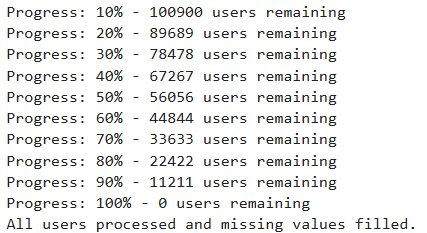

(Note that the code was executed in a different notebook and the output is copied here due to its time-consuming nature.)

In [ ]:
combined_df_filled.to_csv('combined_df_filled.csv', index=False)

In [4]:
combined_df_filled = pd.read_csv("combined_df_filled.csv")

#### 2.10.5. Inspect the combined_df_filled dataset

In [85]:
combined_df_filled.columns

Index(['user', 'adgroup_id', 'nonclk', 'clk', 'cate_id', 'campaign_id',
       'customer', 'brand', 'price', 'cms_segid', 'cms_group_id',
       'final_gender_code', 'age_level', 'pvalue_level', 'shopping_level',
       'occupation', 'new_user_class_level', 'ad_normal_date', 'btag',
       'bh_normal_date'],
      dtype='object')

In [86]:
#inspect if there are any missing values left
combined_df_filled.isna().sum()

user                    0
adgroup_id              0
nonclk                  0
clk                     0
cate_id                 0
campaign_id             0
customer                0
brand                   0
price                   0
cms_segid               0
cms_group_id            0
final_gender_code       0
age_level               0
pvalue_level            0
shopping_level          0
occupation              0
new_user_class_level    0
ad_normal_date          0
btag                    0
bh_normal_date          0
dtype: int64

In [87]:
combined_df_filled.shape

(2552709, 20)

In [88]:
#get an overview of the new dataset
combined_df_filled.head()

,user,adgroup_id,nonclk,clk,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level,ad_normal_date,btag,bh_normal_date
0,358193.0,102.0,0.0,1.0,126.0,138148.0,20107.0,102457.0,98.0,7.0,2.0,2.0,2.0,2.0,3.0,0.0,1.0,2017-05-10 05:25:53,adseen,2017-05-10 05:25:53
1,358193.0,102.0,1.0,0.0,126.0,138148.0,20107.0,102457.0,98.0,7.0,2.0,2.0,2.0,2.0,3.0,0.0,1.0,2017-05-09 19:39:42,adseen,2017-05-09 19:39:42
2,358193.0,102.0,1.0,0.0,126.0,138148.0,20107.0,102457.0,98.0,7.0,2.0,2.0,2.0,2.0,3.0,0.0,1.0,2017-05-09 19:39:42,pv,2017-05-09 13:53:43
3,358193.0,102.0,0.0,1.0,126.0,138148.0,20107.0,102457.0,98.0,7.0,2.0,2.0,2.0,2.0,3.0,0.0,1.0,2017-05-10 05:25:53,pv,2017-05-13 15:17:37
4,358193.0,102.0,1.0,0.0,126.0,138148.0,20107.0,102457.0,98.0,7.0,2.0,2.0,2.0,2.0,3.0,0.0,1.0,2017-05-09 19:39:42,pv,2017-05-08 13:51:09


In [89]:
#check the new proportions of clicks to non clicks 
combined_df_filled['clk'].value_counts(normalize=True)

clk
0.0    0.556825
1.0    0.443175
Name: proportion, dtype: float64

In [5]:
combined_df_filled['btag'].value_counts(normalize=True)

btag
pv        0.891156
adseen    0.072371
cart      0.021789
fav       0.012346
buy       0.002339
Name: proportion, dtype: float64

Upon inspecting the dataset, it was found that the click-to-non-click ratio had been distorted due to the duplication of click information across behavioural rows. Additionally, the behaviour "pv" (page view) in the btag column dominated. While the pv behaviour and its timestamp would be useful for sequencing user actions in a larger dataset and enabling machine models to better extract patterns of user behaviour, this approach does not align with the research goals for this dataset. The goal is to maintain a smaller dataset, and SMEs typically do not have the infrastructure or resources to handle such large volumes of detailed behavioural data, as it is not as commonly available to them as it is to large online retailers. Therefore, all rows with this btag value were removed, as they add unnecessary complexity that is not relevant for the intended analysis.

In [90]:
combined_df_filled = combined_df_filled[combined_df_filled['btag'] != 'pv']

In [91]:
combined_df_filled.shape

(277848, 20)

In [92]:
#check the new proportions of clicks to non clicks 
combined_df_filled['clk'].value_counts(normalize=True)

clk
0.0    0.58835
1.0    0.41165
Name: proportion, dtype: float64

When downsizing, it is essential to restore the original ratio. Random sampling cannot be applied, as it may lead to over-representation of certain users or the removal of others' behaviours, potentially compromising the data quality of the final dataset. All of these issues will be addressed in Jupyter Notebook Part 2.

# 3. Exporting the final dataset:

In [94]:
#save the final dataset as a csv file 
combined_df_filled.to_csv('project_initial_file_new.csv', index=False)